In [27]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
def format_eer_file(file_path):
    assert os.path.exists(file_path)
    eer = []
    mindcf01 = []
    mindcf001 = []
    model_str = ''
    with open(file_path, 'r') as f:
        for l in f.readlines():
            ls = l.split()
            if len(ls) ==0:
                continue
            elif len(ls)< 10:
                model_str = "-".join(ls[1:])
                # print("-".join(ls[1:]))
                test_set=''
                eer = []
                mindcf01 = []
                mindcf001 = []

            elif len(ls)>= 10:
                eer.append(float(ls[3]))
                mindcf01.append(float(ls[7]))
                mindcf001.append(float(ls[9]))
                test_set=ls[1]

            if len(eer)==3:
                print("#|{: ^19s}".format(test_set)+"|  {:>5.2f}±{:<.2f}  |".format(np.mean(eer), np.std(eer)), end=' ')
                print("%.4f±%.4f"%(np.mean(mindcf01), np.std(mindcf01)), end=' ')
                print("| %.4f±%.4f | %s"%(np.mean(mindcf001), np.std(mindcf001), model_str)) 

In [36]:
def read_eer_file(file_path):
    assert os.path.exists(file_path)
    eer = []
    mindcf01 = []
    mindcf001 = []

    result_lst = []
    result_idx = []
    with open(file_path, 'r') as f:
        for l in f.readlines():
            ls = l.split()
            if len(ls) ==0:
                continue
            elif len(ls)>= 10:
                eer.append(float(ls[3]))
                mindcf01.append(float(ls[7]))
                mindcf001.append(float(ls[9]))
                test_set=int(ls[1].split(',')[1])-1 #vox1-test-0,1

            if len(eer)==3:
                result_idx.append(test_set)
                result_lst.append([np.mean(eer), np.mean(mindcf01), np.mean(mindcf001)])
                eer = []
                mindcf01 = []
                mindcf001 = []
                
    result_lst = np.array(result_lst)
    result_idx = np.array(result_idx)
    
    return result_idx, result_lst

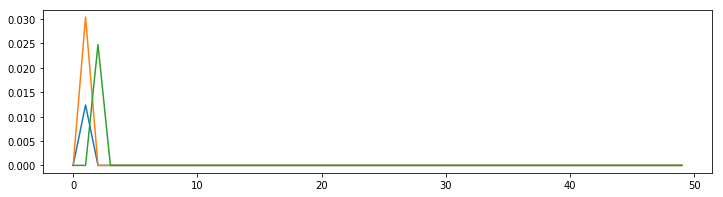

In [8]:
# Plot triangle filters
melfb = librosa.filters.mel(16000, 400)
plt.figure(figsize=(12,3))
for i,x in enumerate(melfb):
    if i<3:
        plt.plot(x[:15])

plt.show()

In [56]:
format_eer_file('data/loresnet.txt')

#|     vox1-test     |   4.19±0.08  | 0.3688±0.0158 | 0.5157±0.0103 | LoResNet-8-chn16
#|   vox1-test-mel   |   4.27±0.07  | 0.3742±0.0120 | 0.4820±0.0467 | LoResNet-8-chn16-mel
#|  vox1-test-clean  |   4.09±0.02  | 0.3620±0.0045 | 0.5199±0.0123 | LoResNet-8-chn16-clean
#|   vox1-test-aug   |   4.15±0.09  | 0.3530±0.0207 | 0.5044±0.0375 | LoResNet-8-chn16-aug
#|  vox1-test-vox2   |   4.00±0.08  | 0.3698±0.0067 | 0.4834±0.0219 | LoResNet-8-chn16-vox2
#|     vox1-test     |   3.51±0.14  | 0.3259±0.0120 | 0.4080±0.0359 | LoResNet-8-chn32
#|   vox1-test-mel   |   3.26±0.12  | 0.3195±0.0081 | 0.4053±0.0321 | LoResNet-8-chn32-mel
#|  vox1-test-clean  |   3.38±0.08  | 0.3192±0.0160 | 0.3971±0.0204 | LoResNet-8-chn32-clean
#|   vox1-test-aug   |   3.33±0.04  | 0.3177±0.0018 | 0.4027±0.0188 | LoResNet-8-chn32-aug
#|  vox1-test-vox2   |   3.37±0.08  | 0.3002±0.0029 | 0.4035±0.0423 | LoResNet-8-chn32-vox2
#|     vox1-test     |   4.19±0.06  | 0.3669±0.0166 | 0.5137±0.0044 | LoResNet-8-chn16-kd+em

In [57]:
format_eer_file('data/test_resnet_220711.log') 

#|     vox1-test     |   5.16±0.07  | 0.4481±0.0179 | 0.6074±0.0292 | ResNet-8-chn16
#|     vox1-test     |   5.12±0.10  | 0.4621±0.0071 | 0.5449±0.0284 | ResNet-8-chn16-attention(rclean)-vox1
#|  vox1-test-rcle   |   5.16±0.02  | 0.4637±0.0093 | 0.5872±0.0136 | chn16-attention3(rclean)-vox1
#|  vox1-test-vox2   |   5.14±0.03  | 0.4767±0.0115 | 0.6072±0.0224 | ResNet-8-chn16-attention(vox2_rclean)-vox1
#|     sitw-test     |   9.69±0.20  | 0.6813±0.0016 | 0.8779±0.0069 | ResNet-8-chn16-attention(rclean)-sitw
#|  sitw-test-rcle   |   9.47±0.17  | 0.6814±0.0082 | 0.8835±0.0187 | ResNet-8-chn16-attention3(rclean)-sitw
#|  sitw-test-vox2   |   9.53±0.11  | 0.6822±0.0101 | 0.8696±0.0194 | ResNet-8-chn16-attention(vox2_rclean)-sitw
#|     vox1-test     |   4.31±0.05  | 0.4005±0.0137 | 0.4999±0.0095 | ResNet-8-chn32
#|     vox1-test     |   4.01±0.06  | 0.3653±0.0092 | 0.4315±0.0262 | ResNet-8-chn64
#|     vox1-test     |   4.24±0.07  | 0.3889±0.0162 | 0.5185±0.0525 | ResNet-10
#|  vox1-test-

In [58]:
format_eer_file('data/test_resnet_sitw_20220713.txt')

#|     sitw-test     |   9.84±0.04  | 0.6933±0.0020 | 0.8924±0.0067 | ResNet-8-chn16
#|     sitw-test     |   8.40±0.11  | 0.6035±0.0068 | 0.7976±0.0112 | ResNet-8-chn32
#|     sitw-test     |   7.97±0.27  | 0.5486±0.0070 | 0.7329±0.0127 | ResNet-8-chn64
#|     sitw-test     |   8.24±0.17  | 0.5871±0.0075 | 0.7768±0.0057 | ResNet-10
#|     sitw-test     |   6.97±0.17  | 0.5203±0.0099 | 0.7152±0.0083 | ResNet-18
#|     sitw-test     |   6.27±0.09  | 0.4681±0.0061 | 0.6555±0.0072 | ResNet-34


In [59]:
format_eer_file('data/tdnn_slimmable.txt')

#|     vox1-test     |   4.73±0.05  | 0.4881±0.0154 | 0.5986±0.0136 | TDNN_v5-vox1-klfb40
#|     vox1-test     |   5.01±0.10  | 0.5041±0.0418 | 0.6068±0.0700 | SlimmableTDNN-1.0-vox1-klfb40
#|     vox1-test     |   5.00±0.16  | 0.4716±0.0230 | 0.5766±0.0314 | SlimmableTDNN-0.75-vox1-klfb40
#|     vox1-test     |   4.93±0.14  | 0.4987±0.0354 | 0.6291±0.0250 | SlimmableTDNN-0.5-vox1-klfb40
#|     vox1-test     |   5.44±0.22  | 0.5182±0.0244 | 0.6418±0.0057 | SlimmableTDNN-0.25-vox1-klfb40


In [60]:
format_eer_file('data/lores_es.txt')

#|     vox1-test     |   3.31±0.12  | 0.3185±0.0173 | 0.4072±0.0169 | LoResNet-8-chn64


In [61]:
# print(result_lst[0], result_lst[-1])
eval_str = ['EER', 'MinDCF08', 'MinDCF10']
set_sets = ['v1', 'sitw']

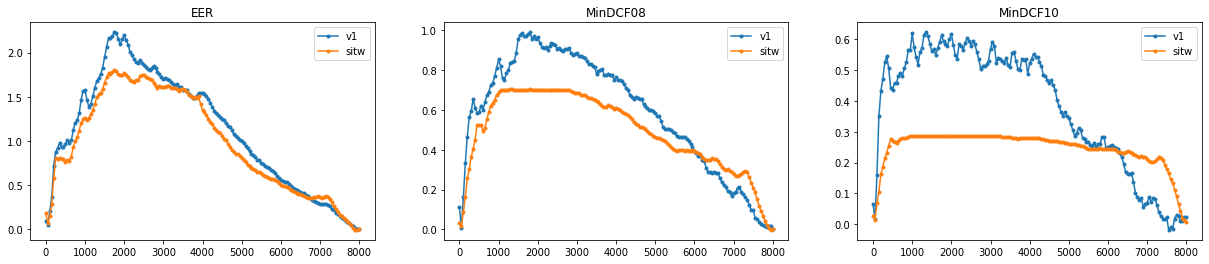

In [62]:
result_idx, result_lst = read_eer_file('data/freq_mask.txt')

norm_eer = np.array([4.24, 0.3889, 0.5185])
norm_sitw_eer = np.array([8.24, 0.5871, 0.7768])

x = np.arange(161) * 8000 / (161 - 1)

plt.figure(figsize=(21, 4))
for i in range(3):
    plt.subplot(1,3,int(i+1))
    
    plt.title(eval_str[i])
    eer_lift = (result_lst[:161, i]-norm_eer[i])/norm_eer[i]
    plt.plot(x, eer_lift, marker = '.')
    
    eer_lift = (result_lst[161:, i]-norm_sitw_eer[i])/norm_sitw_eer[i]
    plt.plot(x, eer_lift, marker = '.')
    
    plt.legend(set_sets)

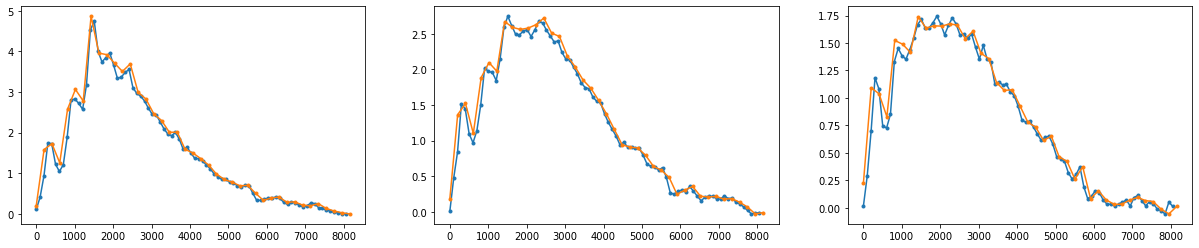

In [63]:
plt.figure(figsize=(21, 4))

# baseline ResNet-34-avg5-vox2 klsp
#|     vox1-test     |  2.08±0.09  |             | 0.1965±0.0011 | 0.3089±0.0059 |
norm_eer = np.array([2.08, 0.1965, 0.3089])
#|     sitw-test     |  3.27±0.13  |             | 0.2661±0.0100 | 0.4016±0.0047 |
norm_sitw_eer = np.array([3.27, 0.2661, 0.4016])

for mask_len in [2, 4]:
    result_idx, result_lst = read_eer_file('data/freq_mask%d.txt'%mask_len)
    x = np.arange(161/mask_len) * 8000 / (161/mask_len - 1)
    
    for i in range(3):
        plt.subplot(1, 3, int(i+1))
        # plt.title(eval_str[i])
        eer_lift = (result_lst[:161, i]-norm_eer[i])/norm_eer[i]
        plt.plot(x, eer_lift, marker = '.')

In [64]:
format_eer_file('data/resnet_fb40.txt')

#|     vox1-test     |   3.60±0.06  | 0.3696±0.0070 | 0.5131±0.0304 | ResNet-50-chn16
#|     vox1-test     |   3.66±0.08  | 0.3703±0.0248 | 0.4460±0.0231 | ResNet-34-chn16
#|     vox1-test     |   3.89±0.05  | 0.3967±0.0145 | 0.4850±0.0160 | ResNet-18-chn16
#|     vox1-test     |   4.25±0.10  | 0.3914±0.0040 | 0.5287±0.0207 | ResNet-10-chn16


In [65]:
format_eer_file('data/aidata.txt')

#|    aidata-test    |   5.33±0.14  | 0.4665±0.0047 | 0.7887±0.0031 | resnet18_seblcok_red2_astp2-wav-fb40-baseline
#|    aidata-test    |   5.86±0.13  | 0.4554±0.0058 | 0.7793±0.0189 | resnet18_seblcok_red2_astp2-wav-fb40-mixup0_0.2
#|    aidata-test    |   5.23±0.16  | 0.4232±0.0072 | 0.7721±0.0056 | resnet18_seblcok_red2_astp2-wav-fb40-clean+half_mixup0_0.2
#|    aidata-test    |   5.14±0.02  | 0.4364±0.0147 | 0.7679±0.0181 | resnet18_seblcok_red2_astp2-wav-fb40-clean+half_mixup0_0.5
#|    aidata-test    |   5.10±0.05  | 0.4776±0.0072 | 0.8081±0.0163 | resnet34_seblcok_red2_k3_astp2-fb40-baseline-server
#|    aidata-test    |   5.62±0.11  | 0.4920±0.0089 | 0.8166±0.0216 | resnet34_seblcok_red2_k3_astp2-fb40-clean+half_mixup0_0.2
#|    aidata-test    |  14.07±11.67  | 0.6608±0.2378 | 0.8756±0.0876 | resnet34_seblcok_red2_k3_astp2-fb40-clean+half_mixup0_0.5
#|    aidata-test    |  20.70±10.64  | 0.8335±0.2329 | 0.9335±0.0931 | resnet34_seblcok_red2_k3_astp2-fb40-clean+half_mixup0_1
#|

In [66]:
format_eer_file('data/resnet_klsp.txt')

#|     vox1-test     |   2.08±0.09  | 0.1965±0.0011 | 0.3089±0.0059 | ResNet34-teacher-Mean_batch256_basic_downk1_avg5_SAP2_em256_dp01_alpha0_none1_wde5_var
#|     vox1-test     |   3.75±0.04  | 0.3624±0.0090 | 0.4668±0.0187 | ResNet18-baseline-batch128_basic_downk1_avg4_SAP2_em256_dp01_alpha0_none1
#|     vox1-test     |   3.59±0.03  | 0.3571±0.0121 | 0.4826±0.0274 | attention-mel_mean
#|     vox1-test     |   3.70±0.08  | 0.3426±0.0203 | 0.4623±0.0587 | ResNet18-baseline-mix2
#|     vox1-test     |   3.55±0.02  | 0.3497±0.0070 | 0.4450±0.0365 | attention-mel_mean-mix2
#|     vox1-test     |   3.73±0.08  | 0.3532±0.0177 | 0.4486±0.0195 | attention-v2_rclean_gax-mix2
#|     vox1-test     |   3.58±0.12  | 0.3414±0.0088 | 0.4582±0.0248 | attention-v2_rclean_gean-mix2
#|     vox1-test     |   4.18±0.07  | 0.4039±0.0090 | 0.5165±0.0224 | ResNet10-baseline-mix2


In [67]:
format_eer_file('data/resnet_fb40_at.txt')

#|     vox1-test     |   3.66±0.08  | 0.3703±0.0248 | 0.4460±0.0231 | batch256_seblock_red2_downk3_avg5_ASTP2_em256_dp01_alpha0_none1_wd5e4_vares
#|     vox1-test     |   3.53±0.06  | 0.3544±0.0158 | 0.4628±0.0317 | batch128_seblock_red2_downk3_avg5_ASTP2_em256_dp01_alpha0_none1_chn32_wd5e4_varesmix2_bashuf2_dist
#|     vox1-test     |   4.25±0.10  | 0.3914±0.0040 | 0.5287±0.0207 | ResNet-10-chn16-baseline
#|     vox1-test     |   4.05±0.04  | 0.3961±0.0076 | 0.4839±0.0299 | ResNet-10-chn16-Student-attention_transfer-1000
#|     vox1-test     |   4.09±0.05  | 0.3876±0.0100 | 0.5330±0.0131 | ResNet-10-chn16-Student-attention_transfer-1000-frequency
#|     vox1-test     |   4.26±0.04  | 0.4033±0.0139 | 0.4873±0.0125 | ResNet-10-chn16-Student-attention_transfer-1000-time
#|     vox1-test     |   3.89±0.05  | 0.3967±0.0145 | 0.4850±0.0160 | ResNet-18-chn16-baseline


In [68]:
format_eer_file('data/resnet_fb80.txt')

#|     vox1-test     |   4.16±0.08  | 0.3981±0.0078 | 0.4637±0.0178 | resnet10-seblock-kernel7,7
#|     vox1-test     |   3.39±0.12  | 0.3470±0.0116 | 0.4240±0.0195 | resnet34-seblock-kernel7,7


In [69]:
format_eer_file('data/vox2_ecapa_fb40.txt')

#|     vox1-test     |   2.04±0.07  | 0.2173±0.0054 | 0.3082±0.0339 | ECAPA-klfb40-vox2-Mean_batch256_SASP2_em192_wde5_2sesmix2_dist
#|     sitw-test     |   3.51±0.13  | 0.3003±0.0112 | 0.4495±0.0121 | ECAPA-klfb40-vox2-Mean_batch256_SASP2_em192_wde5_2sesmix2_dist
#|     vox1-test     |   1.98±0.06  | 0.2063±0.0110 | 0.3055±0.0407 | ECAPA-klfb40-vox2-Mean_batch256_SASP2_em192_wde5_2sesmix2_dist-manifold-[1,2]
#|     sitw-test     |   3.23±0.03  | 0.2905±0.0063 | 0.4470±0.0074 | ECAPA-klfb40-vox2-Mean_batch256_SASP2_em192_wde5_2sesmix2_dist-manifold-[1,2]
